In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/student_data.csv')

In [3]:
df.head()

,IQ,CGPA,Placed
0,121,0.16,0
1,84,4.23,1
2,141,3.95,1
3,130,2.93,0
4,90,0.14,1


In [4]:
df.shape


(100, 3)

#Steps
0. Preprocess +EDA+feature selection
1. Extract input and output cols
2. scale the values
3. train test split
4. train the model
5. evaluate the model/model selection
6. deploy the model

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IQ      100 non-null    int64  
 1   CGPA    100 non-null    float64
 2   Placed  100 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [6]:
# df=df.iloc(:,1:) -> keep all the rows and columns from index1
# df.head() -> preprocessing

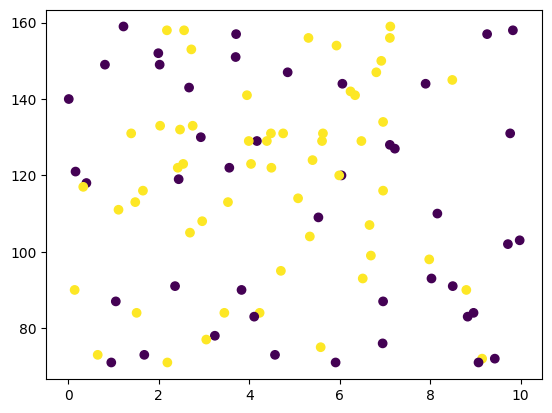

In [7]:
# EDA-> plotting
import matplotlib.pyplot as plt
plt.scatter(df['CGPA'], df['IQ'], c=df['Placed'])

In [8]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [9]:
x # -> 2d tensor

,IQ,CGPA
0,121,0.16
1,84,4.23
2,141,3.95
3,130,2.93
4,90,0.14
...,...,...
95,110,8.16
96,98,7.98
97,84,1.51
98,114,5.08


In [10]:
y.shape # -> 1d tensor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
X_train = scaler.fit_transform(X_train)

In [14]:
X_train

array([[ 0.4444025 ,  0.64932275],
       [ 0.18895216, -0.43763832],
       [-0.68687759,  1.20769316],
       [-0.86934212,  1.22630551],
       [-0.46792015,  0.22496124],
       [ 0.4444025 , -0.21056769],
       [-0.03000528,  0.82800128],
       [ 0.88231737, -0.29246201],
       [ 0.4444025 , -0.27757214],
       [-0.86934212,  0.66049016],
       [-1.08829955,  0.82800128],
       [ 0.91881028,  0.55998348],
       [ 0.4444025 , -0.12867336],
       [-0.94232793, -0.88433465],
       [ 0.99179609,  0.49297903],
       [-1.59920023, -1.13746257],
       [-0.139484  , -1.21191196],
       [-1.67218605, -0.94761663],
       [-0.7963563 , -0.01327681],
       [-0.32194853, -0.66098649],
       [-1.23427118,  1.52410306],
       [-1.19777827, -0.47858549],
       [ 1.24724643, -0.38552375],
       [ 1.28373934, -1.02206602],
       [ 1.02828899,  1.3975391 ],
       [ 1.10127481,  0.04256023],
       [ 1.17426062, -1.46131741],
       [ 0.95530318, -0.7689381 ],
       [ 0.22544506,

In [15]:
X_test = scaler.transform(X_test)
X_test

array([[ 0.04298053, -1.61393866],
       [ 0.18895216, -0.86199984],
       [-0.54090596,  1.85540284],
       [-1.59920023, -0.06166891],
       [ 0.40790959,  0.88383832],
       [ 0.37141669,  0.92478549],
       [-1.59920023, -1.52087692],
       [ 1.42971096,  0.88383832],
       [ 0.51738831,  0.00533554],
       [ 0.26193797,  0.24729605]])

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()

In [19]:
#model training
clf.fit(X_train, y_train)

LogisticRegression()

In [23]:
y_pred=clf.predict(X_test)
y_pred


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1])

In [24]:
y_test

27    0
90    1
22    0
47    0
28    0
24    0
70    1
6     1
33    1
38    1
Name: Placed, dtype: int64

In [25]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6

<Axes: >

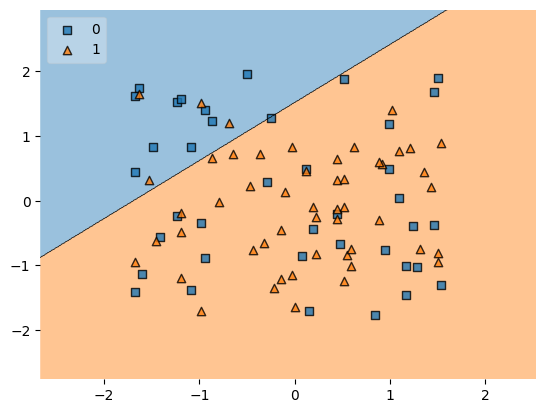

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train, y_train.values, clf=clf,legend=2)

In [27]:
import pickle

In [28]:
pickle.dump(clf,open('model.pkl','wb '))